In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rand

In [35]:
num_of_hidden_unit = 200
batch_size = 3
epoch = 10
weights_init = 0.01
alpha = 0.01/batch_size
CE_freq = 500
#print(num_of_hidden_unit)

In [3]:
#data processing
train_data = (pd.read_csv("~/Developer/kaggle.Digit_Recognizer/datasets/train.csv")
               .iloc[:32000,1:].values).astype('float32')
train_label = (pd.read_csv("~/Developer/kaggle.Digit_Recognizer/datasets/train.csv")
               .iloc[:32000,0].values).astype('int32')
test_data = (pd.read_csv("~/Developer/kaggle.Digit_Recognizer/datasets/train.csv")
               .iloc[32000:,1:].values).astype('float32')
test_label = (pd.read_csv("~/Developer/kaggle.Digit_Recognizer/datasets/train.csv")
               .iloc[32000:,0].values).astype('int32')
#test_data = (pd.read_csv("~/Developer/kaggle.Digit_Recognizer/datasets/test.csv")
#               .iloc[:,:].values).astype('float32')
print(train_data)
print(train_data.shape)
print(train_label)
print(train_label.shape)
print(test_data)
print(test_data.shape)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(32000, 784)
[1 0 1 ..., 7 8 0]
(32000,)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(10000, 784)


In [4]:
#one hot encode label
num_of_labels = train_label.shape[0]
encoded_labels = np.zeros((num_of_labels, 10),
                              dtype=np.int)
for i in range(0, num_of_labels):
    encoded_labels[i][train_label[i]] = 1
train_label = encoded_labels
print(train_label)
print(train_label.shape)
# regularlize data
train_data /= 255
test_data /= 255

[[0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 0]]
(32000, 10)


In [45]:
#weights init
rand.seed(a=123123)
#print(rand.random())
in_to_hid_weights = np.zeros((train_data.shape[1],
                              num_of_hidden_unit),
                             dtype=np.float)
for i in range(0, in_to_hid_weights.shape[0]):
    for j in range(0, in_to_hid_weights.shape[1]):
        in_to_hid_weights[i][j] = weights_init*rand.random()
#print(in_to_hid_weights)
print(in_to_hid_weights.shape)

hid_to_out_weights = np.zeros((num_of_hidden_unit,
                              train_label.shape[1]),
                             dtype=np.float)
for i in range(0, hid_to_out_weights.shape[0]):
    for j in range(0, hid_to_out_weights.shape[1]):
        hid_to_out_weights[i][j] = weights_init*rand.random()
#print(hid_to_out_weights)
print(hid_to_out_weights.shape)

(784, 200)
(200, 10)


In [7]:
#mini batch fprop
batch_index = 0;
#while batch_index+batch_size < train_data.shape[0]:
while  batch_index == 0:
    train_batch = train_data[batch_index:
    batch_index+batch_size,:]
    train_label_batch = train_label[batch_index:
    batch_index+batch_size,:]
    # print(train_batch)
    # print(train_batch.shape)
    # print(train_label_batch)
    # print(train_label_batch.shape)
    batch_index = batch_index+batch_size

In [8]:
#fprop
hid_state = np.dot(train_batch,in_to_hid_weights)
out_state = np.dot(hid_state,hid_to_out_weights)
out_state = 1/(1+np.exp(-out_state))
#print(hid_state)
print(hid_state.shape)
print(out_state)
print(out_state.shape)

(3, 50)
[[ 0.51942104  0.52077914  0.51931537  0.52106471  0.52114331  0.52106417
   0.52026371  0.52364066  0.52097331  0.52042444]
 [ 0.55273113  0.55673243  0.55206406  0.5567647   0.55752369  0.55737593
   0.55494127  0.56381825  0.5562059   0.55479777]
 [ 0.51544744  0.51671695  0.51528931  0.51661705  0.5169427   0.51666803
   0.51605843  0.51870978  0.51652438  0.51617209]]
(3, 10)


In [38]:
#bprop:err
err = out_state-train_label_batch
print(train_label_batch)
print(err)
CE = (err*err/2).sum(axis=1)
print(CE)
print(CE.shape)

d_Out = out_state*(1-out_state)*err


print(d_Out)
print(d_Out.shape)
print(hid_to_out_weights.shape)
print(hid_state.shape)

# [[batch1_dout1, batch1_dout2, ...]
#  [batch2_dout1, batch2_dout2, ...]
#  [batch3_dout1, batch3_dout2, ...]]

# [[batch1_hid1, batch1_hid2, ...]
#  [batch2_hid1, batch2_hid2, ...]
#  [batch3_hid1, batch3_hid2, ...]]
#out
#  [[batch123_hid1*dout1, batch123_hid2*dout2, ...]
#   [batch123_hid2*dout1, batch123_hid2*dout2, ...]
#   ...                                           ]
d_hid_to_out = np.dot(hid_state.transpose(), d_Out)

#print(d_hid_to_out)
print(d_hid_to_out.shape)

#[[hid1_out1, hid1_out2, ...]
# [hid2_out1, hid2_out2, ...]
# [...                      ]]

#[[batch1_dout1, batch1_dout2, ...]
# [batch2_dout1, batch2_dout2, ...]
# [batch3_dout1, batch3_dout2, ...]]
#out
#[[batch1_hid1(out:) batch1_hid2(out:), ...]
# [batch2_hid1(out:) batch2_hid2(out:), ...]
# [...                                     ]]
d_hid = np.dot(d_Out, hid_to_out_weights.transpose())
#print(d_hid)
print(d_hid.shape)
print(in_to_hid_weights.shape)
#[[batch1_dhid1, batch1_dhid2, ...]
# [batch2_dhid1, batch2_dhid2, ...]
# [...                            ]]

#[[batch1_in1, batch1_in2, ...]
# [batch2_in1, batch2_in2, ...]
# [...                        ]]
#out
#[[in1*dhid1(batch123, in1*dhid2(batch123, ...]
# [in2*dhid1(batch123, in2*dhid2(batch123, ...]
# [...                                        ]]

d_in_to_hid = np.dot(train_batch.transpose(),d_hid)
print(d_in_to_hid.shape)

[[0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
[[ 0.51942104 -0.47922086  0.51931537  0.52106471  0.52114331  0.52106417
   0.52026371  0.52364066  0.52097331  0.52042444]
 [-0.44726887  0.55673243  0.55206406  0.5567647   0.55752369  0.55737593
   0.55494127  0.56381825  0.5562059   0.55479777]
 [ 0.51544744 -0.48328305  0.51528931  0.51661705  0.5169427   0.51666803
   0.51605843  0.51870978  0.51652438  0.51617209]]
[ 1.3354373   1.49463955  1.31722381]
(3,)
[[ 0.12965935 -0.1195983   0.12963509  0.13003497  0.13005286  0.13003485
   0.1298523   0.13061751  0.13001416  0.12988901]
 [-0.11057355  0.13739123  0.13651955  0.13739715  0.13753609  0.1375091
   0.1370602   0.13865826  0.13729436  0.1370335 ]
 [ 0.12873886 -0.12068571  0.12870187  0.12901161  0.12908728  0.12902347
   0.12888153  0.12949587  0.12899006  0.12890802]]
(3, 10)
(50, 10)
(3, 50)
(50, 10)
(3, 50)
(784, 50)
(784, 50)


In [37]:
#update weights
del_hid_to_out = -1*alpha*d_hid_to_out
del_in_to_hid = -1*alpha*d_in_to_hid
print(del_hid_to_out.shape)
print(hid_to_out_weights.shape)
print(del_in_to_hid.shape)
print(in_to_hid_weights.shape)
hid_to_out_weights+=del_hid_to_out
in_to_hid_weights+=del_in_to_hid

(50, 10)
(50, 10)
(784, 50)
(784, 50)


0.1139


0.1139


0.1139


0.1058


0.1139


0.1423


0.1334


0.1367


0.2078


0.1773


0.2798


0.2914


0.3241


0.3742


0.4232


0.4296


0.4951


0.5626


0.5595


0.5985


0.6421


0.65


0.6403


0.6779


0.6965


0.7129


0.7179


0.7271


0.7409


0.7561


0.7622


0.7572


0.7764


0.7689


0.7916


0.7856


0.8091


0.8021


0.8053


0.8236


0.8245


0.8324


0.8454


0.8518


0.856


0.8616


0.8613


0.8663


0.8712


0.8792


0.8778


0.8764


0.8792


0.8792


0.8774


0.8833


0.8764


0.8812


0.8836


0.8799


0.8886


0.885


0.8846


0.8891


0.8892


0.8874


0.8866


0.8882


0.8869


0.8904


0.8915


0.8912


0.8906


0.8917


0.8927


0.8896


0.8958


0.8892


0.8897


0.8932


0.8928


0.8971


0.8934


0.8944


0.8976


0.8951


0.8943


0.8934


0.8959


0.8937


0.8966


0.8986


0.8963


0.8941


0.8959


0.8981


0.8952


0.9001


0.8962


0.8961


0.8972


0.8966


0.9015


0.8974


0.8991


0.9015


0.8985


0.8975


0.8973


0.8992


0.8979


0.8993


0.9009


0.8977


0.8966


0.8992


0.9006


0.899


0.9022


0.9006


0.9011


0.9004


0.9004


0.9037


0.8991


0.9014


0.9024


0.9007


0.9009


0.9007


0.9008


0.9008


0.9017


0.9025


0.9006


0.9


0.9012


0.9024


0.9015


0.9031


0.9025


0.9028


0.9015


0.9018


0.9049


0.9007


0.9037


0.9041


0.9006


0.903


0.902


0.9019


0.9023


0.9028


0.9028


0.9013


0.9023


0.9016


0.9033


0.9028


0.9033


0.9029


0.9044


0.9034


0.9033


0.905


0.901


0.9052


0.9041


0.9011


0.9035


0.903


0.902


0.9037


0.9025


0.9049


0.9021


0.9032


0.9023


0.9044


0.9029


0.9052


0.9043


0.9049


0.9049


0.9046


0.9064


0.9008


0.9067


0.9054


0.9025


0.9039


0.9038


0.9023


0.9045


0.9025


0.905


0.9036


0.905


0.9032


0.9057


0.903


0.9055


0.9061


0.9051


0.9066


0.9055


0.9073


0.9025


0.906


train complete


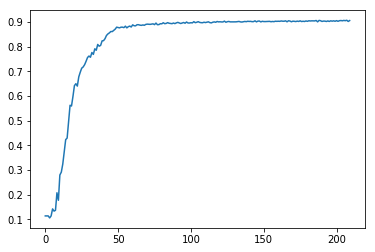

In [46]:
###########train###############
benchmark = np.zeros(1)
#mini batch fprop
for i in range(0,epoch):
    train_No = 0;
    batch_index = 0;
    while batch_index+batch_size < train_data.shape[0]:
        train_batch = train_data[batch_index:
        batch_index+batch_size,:]
        train_label_batch = train_label[batch_index:
        batch_index+batch_size,:]
        batch_index = batch_index+batch_size
        
        #fprop
        hid_state = np.dot(train_batch,in_to_hid_weights)
        out_state = np.dot(hid_state,hid_to_out_weights)
        out_state = 1/(1+np.exp(-out_state))
        
        #bprop:err
        err = out_state-train_label_batch
        CE = (err*err/2).sum(axis=1)
        d_Out = out_state*(1-out_state)*err
        d_hid_to_out = np.dot(hid_state.transpose(), d_Out)
        d_hid = np.dot(d_Out, hid_to_out_weights.transpose())
        d_in_to_hid = np.dot(train_batch.transpose(),d_hid)
        
        #update weights
        del_hid_to_out = -1*alpha*d_hid_to_out
        del_in_to_hid = -1*alpha*d_in_to_hid    
        hid_to_out_weights+=del_hid_to_out
        in_to_hid_weights+=del_in_to_hid
        
        train_No += 1
        #evaluation
        
        if train_No % CE_freq == 0:
            
            hid_state = np.dot(test_data,in_to_hid_weights)
            out_state = np.dot(hid_state,hid_to_out_weights)
            out_state = 1/(1+np.exp(-out_state))
            prediction = np.argmax(out_state,axis=1)
            eval = np.abs(prediction-test_label)
            eval = np.bincount(eval)[0]/10000
            benchmark = np.append(benchmark, [eval])
            print(eval)
            #print(benchmark)
            
print('train complete')
benchmark = benchmark[1:]
Numbers = range(0,benchmark.shape[0])
plt.plot(Numbers, benchmark)
plt.show()

0.906
[ 0.1139  0.1139  0.1139  0.1058  0.1139  0.1423  0.1334  0.1367  0.2078
  0.1773  0.2798  0.2914  0.3241  0.3742  0.4232  0.4296  0.4951  0.5626
  0.5595  0.5985  0.6421  0.65    0.6403  0.6779  0.6965  0.7129  0.7179
  0.7271  0.7409  0.7561  0.7622  0.7572  0.7764  0.7689  0.7916  0.7856
  0.8091  0.8021  0.8053  0.8236  0.8245  0.8324  0.8454  0.8518  0.856
  0.8616  0.8613  0.8663  0.8712  0.8792  0.8778  0.8764  0.8792  0.8792
  0.8774  0.8833  0.8764  0.8812  0.8836  0.8799  0.8886  0.885   0.8846
  0.8891  0.8892  0.8874  0.8866  0.8882  0.8869  0.8904  0.8915  0.8912
  0.8906  0.8917  0.8927  0.8896  0.8958  0.8892  0.8897  0.8932  0.8928
  0.8971  0.8934  0.8944  0.8976  0.8951  0.8943  0.8934  0.8959  0.8937
  0.8966  0.8986  0.8963  0.8941  0.8959  0.8981  0.8952  0.9001  0.8962
  0.8961  0.8972  0.8966  0.9015  0.8974  0.8991  0.9015  0.8985  0.8975
  0.8973  0.8992  0.8979  0.8993  0.9009  0.8977  0.8966  0.8992  0.9006
  0.899   0.9022  0.9006  0.9011  0.9004  0.90

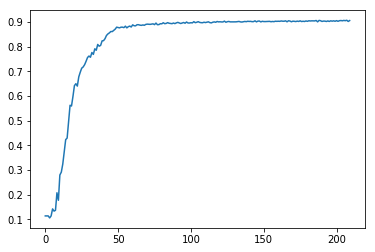

In [47]:
# evaluation

# hid_state = np.dot(test_data,in_to_hid_weights)
# out_state = np.dot(hid_state,hid_to_out_weights)
# out_state = 1/(1+np.exp(-out_state))
# #print(out_state)
# prediction = np.argmax(out_state,axis=1)


# print(prediction)
# print(prediction.shape)
# print(test_label)
# print(test_label.shape)

eval = np.abs(prediction-test_label)
eval = np.bincount(eval)[0]/10000
print(eval)
print(benchmark)
No = range(0,benchmark.shape[0])
plt.plot(No, benchmark)
plt.show()

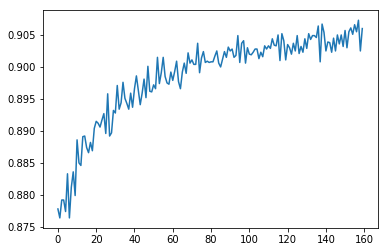

In [48]:
#plot
benchmark = benchmark[50:]
Numbers = range(0,benchmark.shape[0])
plt.plot(Numbers, benchmark)
plt.show()